# Aprendizaje Automatico I - Gravi Fiorino - Gauto

Importamos librerias

In [200]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

3. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada
una de las variables involucradas en el problema detallando características,
comportamiento y rango de variación.
Debe incluir:
    * Análisis y decisión sobre datos faltantes.
    * Visualización de datos (por ejemplo histogramas, scatterplots entre variables,
    diagramas de caja)
    * ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
    * Codificación de variables categóricas (si se van a utilizar para predicción).
    * Matriz de correlación de variables.
    * Estandarización de datos.

    * Validación cruzada train - test. Realizar una división del conjunto de datos en
    conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir
    validación, que luego será útil)
    * en el MOMENTO donde usted lo crea adecuado.

Leemos archivo

In [201]:
archivo = pd.read_csv("weatherAUS.csv")
archivo.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [202]:
archivo.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

# Análisis Exploratorio

In [203]:
archivo.head(3)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0


Dropeamos columna "Unnamed: 0"

In [204]:
archivo = archivo.drop("Unnamed: 0", axis = "columns")

### Eliminacion de ciudades

Nos quedamos con las ciudades de interes:  
* Adelaide,  
* Canberra, 
* Cobar, 
* Dartmoor, 
* Melbourne,
* MelbourneAirport, 
* MountGambier, 
* Sydney, 
* SydneyAirport.

In [205]:
ciudadesDeInteres = ["Adelaide","Canberra","Cobar", "Dartmoor","Melbourne","MelbourneAirport", "MountGambier", "Sydney", "SydneyAirpor"]

In [206]:
df = archivo[archivo['Location'].isin(ciudadesDeInteres)]
#df.head()

In [207]:
df["Location"].unique()

array(['Cobar', 'Sydney', 'Canberra', 'MelbourneAirport', 'Melbourne',
       'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

Nos parecio imperativo conocer la estación del año en la que nos encontramos. Por lo tanto, construimos una funcion para ello

In [208]:
df['Date'] = pd.to_datetime(df['Date'])

def get_season(month):
    if month in [12, 1, 2]:  # Diciembre, Enero, Febrero -> Verano
        return 'Verano'
    elif month in [3, 4, 5]:  # Marzo, Abril, Mayo -> Otoño
        return 'Otoño'
    elif month in [6, 7, 8]:  # Junio, Julio, Agosto -> Invierno
        return 'Invierno'
    else:  # Septiembre, Octubre, Noviembre -> Primavera
        return 'Primavera'
df['Season'] = df['Date'].dt.month.map(get_season)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\426852557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\426852557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].dt.month.map(get_season)


### Boxplots

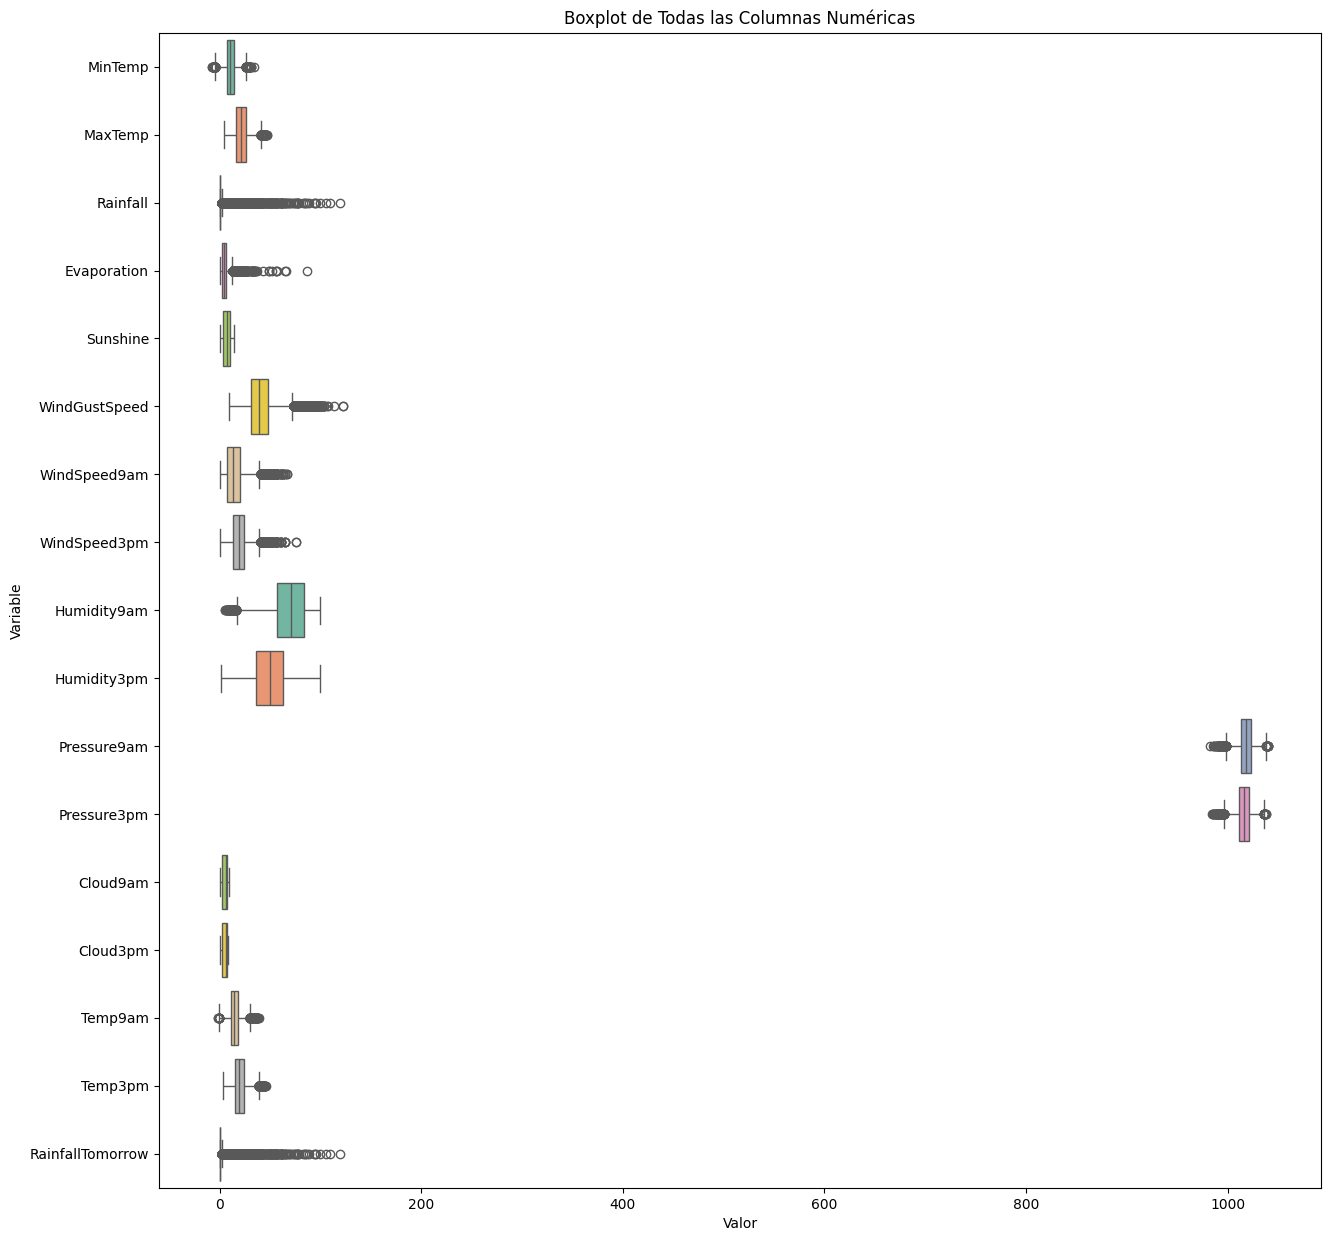

In [210]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(15, 15))
sns.boxplot(data=numeric_columns, orient='h', palette='Set2')

# Añadir título y etiquetas
plt.title('Boxplot de Todas las Columnas Numéricas')
plt.xlabel('Valor')
plt.ylabel('Variable')

# Mostrar el boxplot
plt.show()

## Nulos

In [211]:
df.isnull().sum()

Date                   0
Location               0
MinTemp              569
MaxTemp              558
Rainfall             982
Evaporation         4307
Sunshine            6697
WindGustDir         1594
WindGustSpeed       1591
WindDir9am          1640
WindDir3pm           433
WindSpeed9am         355
WindSpeed3pm         339
Humidity9am          938
Humidity3pm          886
Pressure9am          831
Pressure3pm          826
Cloud9am            9363
Cloud3pm            9550
Temp9am              584
Temp3pm              575
RainToday            982
RainTomorrow         981
RainfallTomorrow     981
Season                 0
dtype: int64

In [212]:
#df['WindGustDir'].head(4)
#df['WindGustSpeed'].head(4)
#df['WindDir9am'].head(4)
#df['WindDir3pm'].head(4)
#df['RainToday'].head(4)
#df['RainTomorrow'].head(4)


### Nulos numéricos

Valores nulos de Mediana, son aquellos valores que decidimos completar con esta medida, por ejemplo las temperaturas minimas y maximas, los valores de Rainfall y Evaporation, la presion a las 3 y 9, nubosidad y temperatura a 3 y 9

In [213]:
"""
Esta funcion la creamos para poder setear las medianas por locación y estación.
Principalmente creímos que esto es lo apropiado debido a que aspectos como la temperatura,
lluvia, presión, etc., son sensibles tanto a la región como a la estación en la que se miden.
Nos pareció apropiado distinguir las medianas de según cada región y estación del año.
"""

def nulos_mediana(col):
    mediana = df.groupby(['Location', 'Season'])[col].transform('median')
    df.loc[df[col].isnull(), col] = mediana

In [214]:
# Min temp
nulos_mediana('MinTemp')
# Max temp
nulos_mediana('MaxTemp')
# Rainfall
nulos_mediana('Rainfall')
# Evaporation
nulos_mediana('Evaporation')
# Pressure9am
nulos_mediana('Pressure9am')
# Pressure3pm
nulos_mediana('Pressure3pm')
# Temp9am , 3pm
nulos_mediana('Temp9am')
nulos_mediana('Temp3pm')
# Rainfall tomorrow
nulos_mediana('RainfallTomorrow')
# WindGustSpeed
nulos_mediana('WindGustSpeed')
# WindSpeed
nulos_mediana('WindSpeed9am')
nulos_mediana('WindSpeed3pm')



In [215]:
df.isnull().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation            0
Sunshine            6697
WindGustDir         1594
WindGustSpeed          0
WindDir9am          1640
WindDir3pm           433
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am          938
Humidity3pm          886
Pressure9am            0
Pressure3pm            0
Cloud9am            9363
Cloud3pm            9550
Temp9am                0
Temp3pm                0
RainToday            982
RainTomorrow         981
RainfallTomorrow       0
Season                 0
dtype: int64

In [216]:
df['Cloud9am'].isnull().sum(), df['Cloud3pm'].isnull().sum()

(9363, 9550)

Valores nulos que decidimos llenar con la media, debido a sus pocos casos atipicos. Sunshine, Humidity, Cloud

In [217]:
def nulos_media(col):
    media = df.groupby(['Location','Season'])[col].transform('mean')
    df[col].fillna(media, inplace=True)


In [218]:
# Sunshine
nulos_media('Sunshine')
# Humidity 9am
nulos_media('Humidity9am')
nulos_media('Humidity3pm')
# Cloud
nulos_media('Cloud9am')
nulos_media('Cloud3pm')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\2054978543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(media, inplace=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\2054978543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(media, inplace=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\2054978543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(media, inplac

In [219]:
df['Cloud9am'].isnull().sum(), df['Cloud3pm'].isnull().sum()

(6200, 6200)

Hay valores nulos de las columnas Cloud que no se imputaron. Veamos un poco por qué sucede esto:

In [220]:
df[['Location','Season','Cloud3pm','Cloud9am']].groupby(['Location', 'Season']).mean()

Cloud3pm  Cloud9am
Location         Season                       
Adelaide         Invierno        NaN       NaN
                 Otoño           NaN       NaN
                 Primavera       NaN       NaN
                 Verano          NaN       NaN
Canberra         Invierno   4.989565  5.129830
                 Otoño      4.603679  4.555721
                 Primavera  4.795876  4.729008
                 Verano     4.755340  5.100000
Cobar            Invierno   4.097421  3.766234
                 Otoño      3.850559  3.442504
                 Primavera  3.566303  2.902866
                 Verano     3.905426  3.043548
Dartmoor         Invierno        NaN       NaN
                 Otoño           NaN       NaN
                 Primavera       NaN       NaN
                 Verano          NaN       NaN
Melbourne        Invierno   5.974359  5.421141
                 Otoño      5.295019  5.267420
                 Primavera  5.429630  5.444640
                 Verano     4.416856  5.064935
MelbourneAirport Invierno   5.785526  5.286842
                 Otoño      5.337093  5.214286
                 Primavera  5.405220  5.353022
                 Verano     4.485437  5.128809
MountGambier     Invierno   6.001348  5.738776
                 Otoño      5.666232  5.646597
                 Primavera  5.637784  5.471004
                 Verano     4.576816  5.210235
Sydney           Invierno   4.034530  3.810773
                 Otoño      4.279891  4.091156
                 Primavera  4.082504  4.056980
                 Verano     4.521880  4.868078

Como vemos, para las locaciones de Darmoor y Adelaide tenemos valores nulos para la agrupación entre Location y Season.
Tras una breve discusión, concluimos en que lo ideal es otorgarle.
Para ello haremos uso de dos librerías de python: Geopandas y Folium

In [221]:
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
app = Nominatim(user_agent='tycgis')


In [222]:
def distancia(location1:str, location2:str):
    #Calcula la distancia entre dos locaciones
    
    infoLocation1 = app.geocode(location1).raw
    infoLocation2 = app.geocode(location2).raw

    latitude1 = infoLocation1['lat']
    longitude1 = infoLocation1['lon']

    latitude2 = infoLocation2['lat']
    longitude2 = infoLocation2['lon']

    punto1 = (latitude1, longitude1)
    punto2 = (latitude2, longitude2)

    distancia = geodesic(punto1, punto2)

    return distancia

Nos queda armar algun algoritmo que verifique las distancias a cada ciudad y tome la menor distancia para obtener esos valores.

In [223]:
def locacionMasCercana(arr, location1:str):
    #Toma un array con o locaciones y para la seleccionada encuentra la locacion mas cercana
    masCercana = (float('inf'),'')
    for location in arr:
        if location1 != location:
            d = distancia(location1, location)
            if d < masCercana[0]:
                masCercana = (d, location)

    return masCercana

In [224]:
locaciones = list(df['Location'].unique())

In [225]:
#Eliminamos el aeropuerto de melbourne ya que tienen casi la misma longitud y latitud
locaciones.remove('MelbourneAirport')

In [226]:
#Separamos Mount de Gambier para que la funcion de distancia lo reconozca
locaciones[-1] = 'Mount Gambier'
locaciones

['Cobar',
 'Sydney',
 'Canberra',
 'Melbourne',
 'Dartmoor',
 'Adelaide',
 'Mount Gambier']

In [227]:
masCercanaAdelaide = locacionMasCercana(locaciones, 'Adelaide')
masCercanaDartmoor = locacionMasCercana(locaciones, 'Dartmoor')

In [228]:
masCercanaAdelaide

(Distance(376.3248825160368), 'Mount Gambier')

Ahora solo queda inputar los valores nulos de cada locacion con las medias y/o medianas de su locacion mas cercana. Retomemos:

In [229]:
df.Season.unique()

array(['Verano', 'Otoño', 'Invierno', 'Primavera'], dtype=object)

Inputación de valores nulos para Adelaide según la locación y la estación.

In [230]:
for estacion in ['Invierno', 'Verano', 'Otoño', 'Primavera']:
    media = df[(df['Cloud3pm'].notnull()) & (df['Location'] == masCercanaAdelaide[1].replace(' ','')) & (df['Season'] == estacion)]['Cloud3pm'].mean()
    df.loc[(df['Location'] == 'Adelaide') & (df['Season'] == estacion),'Cloud3pm'] = df.loc[(df['Location'] == 'Adelaide') & (df['Season'] == estacion)]['Cloud3pm'].fillna(media)

    media = df[(df['Cloud9am'].notnull()) & (df['Location'] == masCercanaAdelaide[1].replace(' ','')) & (df['Season'] == estacion)]['Cloud9am'].mean()
    df.loc[(df['Location'] == 'Adelaide') & (df['Season'] == estacion),'Cloud9am'] = df.loc[(df['Location'] == 'Adelaide') & (df['Season'] == estacion)]['Cloud9am'].fillna(media)

Inputación de valores nulos para Dartmoor

In [231]:
for estacion in ['Invierno', 'Verano', 'Otoño', 'Primavera']:
    media = df[(df['Cloud3pm'].notnull()) & (df['Location'] == masCercanaDartmoor[1].replace(' ','')) & (df['Season'] == estacion)]['Cloud3pm'].mean()
    df.loc[(df['Location'] == 'Dartmoor') & (df['Season'] == estacion),'Cloud3pm'] = df.loc[(df['Location'] == 'Dartmoor') & (df['Season'] == estacion)]['Cloud3pm'].fillna(media)

    media = df[(df['Cloud9am'].notnull()) & (df['Location'] == masCercanaDartmoor[1].replace(' ','')) & (df['Season'] == estacion)]['Cloud9am'].mean()
    df.loc[(df['Location'] == 'Dartmoor') & (df['Season'] == estacion),'Cloud9am'] = df.loc[(df['Location'] == 'Dartmoor') & (df['Season'] == estacion)]['Cloud9am'].fillna(media)

In [232]:
df.isnull().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation            0
Sunshine               0
WindGustDir         1594
WindGustSpeed          0
WindDir9am          1640
WindDir3pm           433
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am               0
Cloud3pm               0
Temp9am                0
Temp3pm                0
RainToday            982
RainTomorrow         981
RainfallTomorrow       0
Season                 0
dtype: int64

### Nulos Categóricos

Para los categóricos reeemplazamos con la media. WindgustDir, Windir 9am 3pm, RainToday tomorrow

In [233]:
def nulos_moda(col):
    df[col].fillna(df.groupby(['Location', 'Season'])[col].transform(lambda x: x.mode().iloc[0]), inplace=True)

In [234]:
# WindGustDir
nulos_moda('WindGustDir')
# WindDir
nulos_moda('WindDir9am')
nulos_moda('WindDir3pm')
# Rain
nulos_moda('RainToday')
nulos_moda('RainTomorrow')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\1568687180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df.groupby(['Location', 'Season'])[col].transform(lambda x: x.mode().iloc[0]), inplace=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\1568687180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df.groupby(['Location', 'Season'])[col].transform(lambda x: x.mode().iloc[0]), inplace=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_17532\1568687180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [235]:
print(df.groupby('Location')['WindGustDir'].apply(lambda x: x.mode()))

Location           
Adelaide          0    WSW
Canberra          0     NW
Cobar             0     SW
Dartmoor          0    SSW
Melbourne         0      N
MelbourneAirport  0      N
MountGambier      0      S
Sydney            0      W
Name: WindGustDir, dtype: object


In [236]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
Season              0
dtype: int64

## Visualización

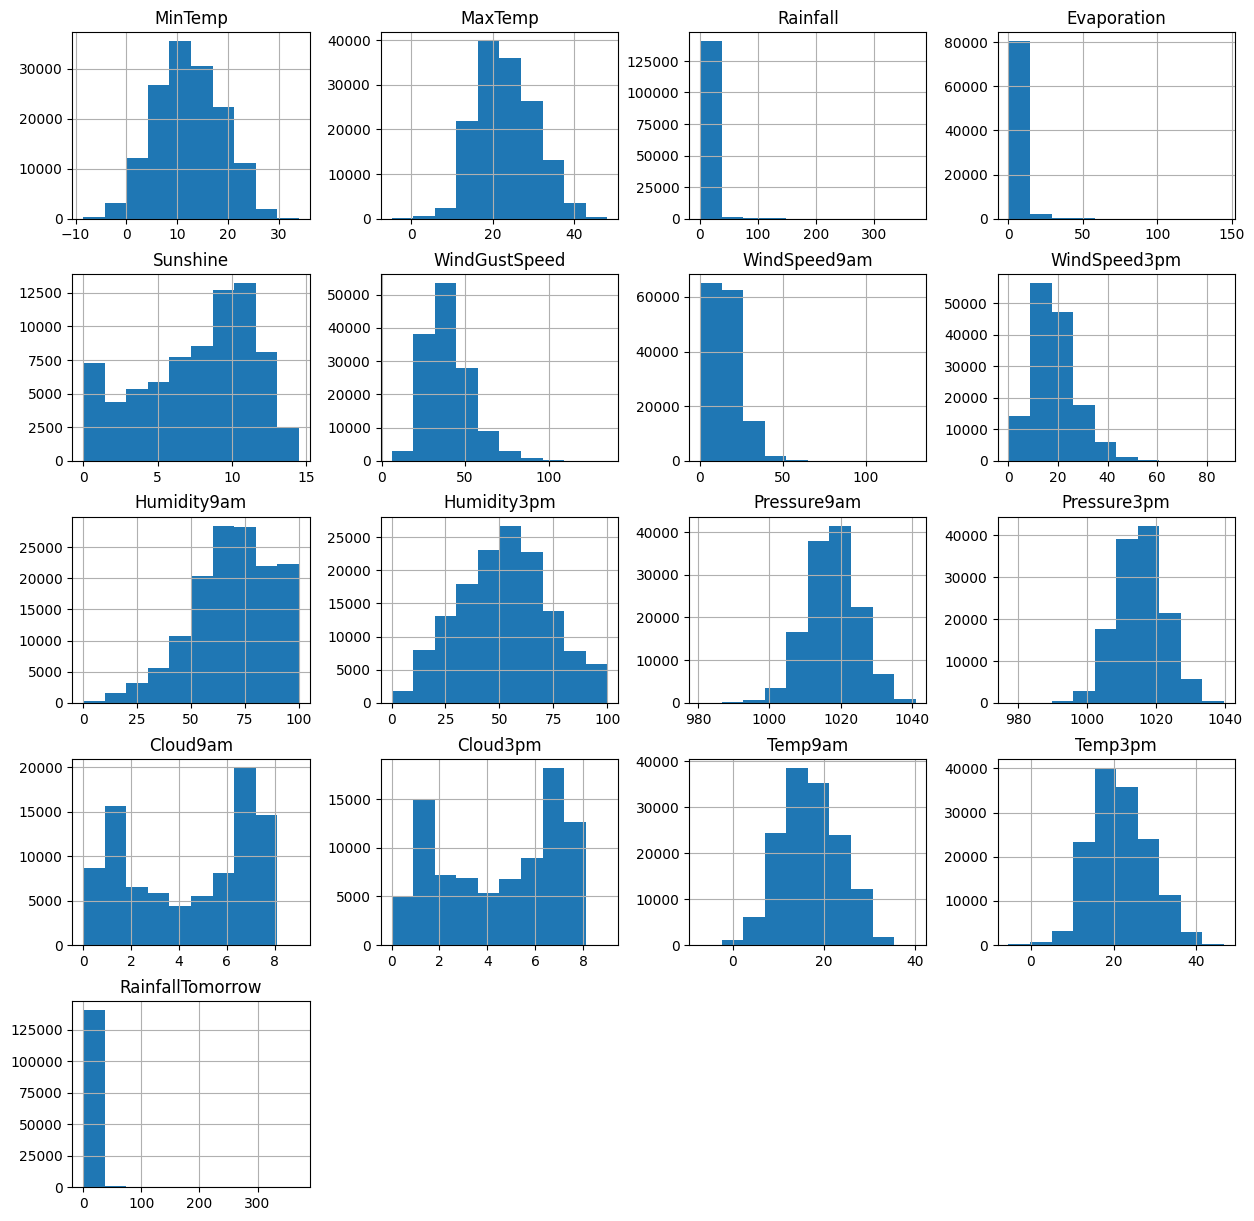

In [238]:
archivo.hist(figsize=(15, 15))
plt.show()

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25225 entries, 6047 to 102519
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              25225 non-null  datetime64[ns]
 1   Location          25225 non-null  object        
 2   MinTemp           25225 non-null  float64       
 3   MaxTemp           25225 non-null  float64       
 4   Rainfall          25225 non-null  float64       
 5   Evaporation       25225 non-null  float64       
 6   Sunshine          25225 non-null  float64       
 7   WindGustDir       25225 non-null  object        
 8   WindGustSpeed     25225 non-null  float64       
 9   WindDir9am        25225 non-null  object        
 10  WindDir3pm        25225 non-null  object        
 11  WindSpeed9am      25225 non-null  float64       
 12  WindSpeed3pm      25225 non-null  float64       
 13  Humidity9am       25225 non-null  float64       
 14  Humidity3pm       25225

### Heatmap

In [241]:
#Heatmap de variables numericas

# Regresión Lineal